In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import pearsonr
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

In [2]:
profiler = pd.read_csv("Finalised_Data.csv")
#Data Cleaning
X_train, X_test, y_train, y_test = train_test_split(profiler[['SpCond (us/cm)','pH']],
                                                    profiler["Lab_Chlorophyll (ug/l)"], train_size=0.7, random_state=123)
from sklearn.preprocessing import MinMaxScaler
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)

Tuning Batch size and Epochs

In [11]:
#create model
model = KerasRegressor(build_fn=create_my_model)

In [12]:
#defining grid search Parameters
batchsize = [20, 40, 80, 100]
epochs = [50,100,150]
parameter_grid = dict(batch_size = batchsize, epochs = epochs)

In [13]:
mygrid =GridSearchCV(estimator=model,param_grid = parameter_grid, n_jobs=-1,cv=3)
grid_result = mygrid.fit(X_train_scaled, y_train_scaled)

Epoch 1/150
2799/2799 [==============================] - 19s 7ms/step - loss: 0.0020 - mae: 0.0206 - mse: 0.0020
Epoch 2/150
2799/2799 [==============================] - 20s 7ms/step - loss: 4.0180e-04 - mae: 0.0124 - mse: 4.0180e-04
Epoch 3/150
2799/2799 [==============================] - 20s 7ms/step - loss: 3.9174e-04 - mae: 0.0122 - mse: 3.9174e-04
Epoch 4/150
2799/2799 [==============================] - 21s 8ms/step - loss: 3.7950e-04 - mae: 0.0119 - mse: 3.7950e-04
Epoch 5/150
2799/2799 [==============================] - 21s 7ms/step - loss: 3.7057e-04 - mae: 0.0118 - mse: 3.7057e-04
Epoch 6/150
2799/2799 [==============================] - 17s 6ms/step - loss: 3.6217e-04 - mae: 0.0116 - mse: 3.6217e-04
Epoch 7/150
2799/2799 [==============================] - 21s 7ms/step - loss: 3.5945e-04 - mae: 0.0115 - mse: 3.5945e-04
Epoch 8/150
2799/2799 [==============================] - 19s 7ms/step - loss: 3.5344e-04 - mae: 0.0114 - mse: 3.5344e-04
Epoch 9/150
2799/2799 [=================

In [14]:
print(grid_result.best_score_, grid_result.best_params_)

-0.00027252866614920396 {'batch_size': 40, 'epochs': 150}


Tuning Optimizer lr= 0.01

In [3]:
#Function to create model using obtained batch size and epochs
def create_my_model(optimizer= 'adam'):
    mymodel = Sequential()
    mymodel.add(Dense(50,activation='relu',input_shape=(2,)))
    mymodel.add(Dense(40,activation='relu'))
    mymodel.add(Dense(1,activation='sigmoid'))
    #Compiling Model
    mymodel.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ['mae', 'mse'])
    return mymodel

In [4]:
#create model
model = KerasRegressor(build_fn=create_my_model, epochs = 150, batch_size = 40)

In [5]:
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)

In [60]:
mygrid =GridSearchCV(estimator=model,param_grid = parameter_grid, n_jobs=-1,cv=3)
grid_result = mygrid.fit(X_train_scaled, y_train_scaled)

Epoch 1/150
1126/1126 [==============================] - 1s 789us/step - loss: 0.0045 - mae: 0.0322 - mse: 0.0045
Epoch 2/150
1126/1126 [==============================] - 1s 789us/step - loss: 4.6367e-04 - mae: 0.0140 - mse: 4.6367e-04
Epoch 3/150
1126/1126 [==============================] - 1s 789us/step - loss: 4.3672e-04 - mae: 0.0133 - mse: 4.3672e-04
Epoch 4/150
1126/1126 [==============================] - 1s 784us/step - loss: 4.2554e-04 - mae: 0.0131 - mse: 4.2554e-04
Epoch 5/150
1126/1126 [==============================] - 1s 786us/step - loss: 4.1991e-04 - mae: 0.0129 - mse: 4.1991e-04
Epoch 6/150
1126/1126 [==============================] - 1s 785us/step - loss: 4.1754e-04 - mae: 0.0129 - mse: 4.1754e-04
Epoch 7/150
1126/1126 [==============================] - 1s 785us/step - loss: 4.1270e-04 - mae: 0.0128 - mse: 4.1270e-04
Epoch 8/150
1126/1126 [==============================] - 1s 784us/step - loss: 4.0955e-04 - mae: 0.0127 - mse: 4.0955e-04
Epoch 9/150
1126/1126 [=========

In [61]:
print(grid_result.best_score_, grid_result.best_params_)

-0.0003240982089967777 {'optimizer': 'Adam'}


Tuning Learning Rate

In [6]:
#Function to create model using obtained optimizer, batch size and epochs
opt = Adam(lr=0.01)
mymodel = Sequential()
mymodel.add(Dense(50,activation='relu',input_shape=(2,)))
mymodel.add(Dense(40,activation='relu'))
mymodel.add(Dense(1,activation='sigmoid'))
#Compiling Model
mymodel.compile(loss='mean_squared_error', optimizer= opt, metrics = ['mae', 'mse'])

In [7]:
lr1 = mymodel.fit(X_train_scaled, y_train_scaled,epochs = 150, batch_size = 40)

Epoch 1/150
2799/2799 [==============================] - 2s 754us/step - loss: 0.0010 - mae: 0.0183 - mse: 0.0010
Epoch 2/150
2799/2799 [==============================] - 2s 751us/step - loss: 5.8071e-04 - mae: 0.0155 - mse: 5.8071e-04
Epoch 3/150
2799/2799 [==============================] - 2s 752us/step - loss: 5.7727e-04 - mae: 0.0154 - mse: 5.7727e-04
Epoch 4/150
2799/2799 [==============================] - 2s 752us/step - loss: 5.7536e-04 - mae: 0.0154 - mse: 5.7536e-04
Epoch 5/150
2799/2799 [==============================] - 2s 746us/step - loss: 5.6647e-04 - mae: 0.0153 - mse: 5.6647e-04
Epoch 6/150
2799/2799 [==============================] - 2s 748us/step - loss: 5.6153e-04 - mae: 0.0152 - mse: 5.6153e-04
Epoch 7/150
2799/2799 [==============================] - 2s 747us/step - loss: 5.6317e-04 - mae: 0.0152 - mse: 5.6317e-04
Epoch 8/150
2799/2799 [==============================] - 2s 745us/step - loss: 5.5921e-04 - mae: 0.0151 - mse: 5.5921e-04
Epoch 9/150
2799/2799 [=========

In [4]:
def evaluate_tr(model, X_train_scaled, y_train_scaled):
    predictions = model.predict(X_train_scaled)
    RMSE_RF = metrics.mean_squared_error(y_train_scaled, predictions,squared=True)
    RSQUARED_RF = metrics.r2_score(y_train_scaled, predictions)
    Ht = pd.DataFrame(y_train_scaled)
    Gt = pd.DataFrame(predictions)
    correlation_tr = pearsonr(Ht[0],Gt[0])
    Metrics_RF = [RMSE_RF, RSQUARED_RF,correlation_tr]
    print(Metrics_RF)
    return Metrics_RF

def evaluate(model, X_test_scaled, y_test_scaled):
    predictions = model.predict(X_test_scaled)
    RMSE_RF = metrics.mean_squared_error(y_test_scaled, predictions,squared=True)
    RSQUARED_RF = metrics.r2_score(y_test_scaled, predictions)
    Ht = pd.DataFrame(y_test_scaled)
    Gt = pd.DataFrame(predictions)
    correlation_tr = pearsonr(Ht[0],Gt[0])
    Metrics_RF = [RMSE_RF, RSQUARED_RF,correlation_tr]
    print(Metrics_RF)
    return Metrics_RF

In [10]:
evaluate(mymodel, X_test_scaled, y_test_scaled)

[0.0005069917089615248, 0.4718651342163859, (0.6877651046607344, 0.0)]


[0.0005069917089615248, 0.4718651342163859, (0.6877651046607344, 0.0)]

In [11]:
evaluate_tr(mymodel,X_train_scaled, y_train_scaled)

[0.0005412503800585637, 0.4583458683728633, (0.6782379344336141, 0.0)]


[0.0005412503800585637, 0.4583458683728633, (0.6782379344336141, 0.0)]

Tuning Learning Rate Lr = 0.0001

In [3]:
opt = Adam(lr=0.001)
mymodel = Sequential()
mymodel.add(Dense(50,activation='relu',input_shape=(2,)))
mymodel.add(Dense(40,activation='relu'))
mymodel.add(Dense(1,activation='sigmoid'))
#Compiling Model
mymodel.compile(loss='mean_squared_error', optimizer= opt, metrics = ['mae', 'mse'])
lr2 = mymodel.fit(X_train_scaled, y_train_scaled,epochs = 150, batch_size = 40, validation_split=0.2)
#Saving model
from keras.models import load_model

mymodel.save('ANN_best_pHand SpCond_model.keras') 

Epoch 1/150
2239/2239 [==============================] - 2s 1ms/step - loss: 0.0038 - mae: 0.0290 - mse: 0.0038 - val_loss: 5.7722e-04 - val_mae: 0.0157 - val_mse: 5.7722e-04
Epoch 2/150
2239/2239 [==============================] - 2s 894us/step - loss: 5.7824e-04 - mae: 0.0156 - mse: 5.7824e-04 - val_loss: 5.6036e-04 - val_mae: 0.0155 - val_mse: 5.6036e-04
Epoch 3/150
2239/2239 [==============================] - 2s 920us/step - loss: 5.6610e-04 - mae: 0.0153 - mse: 5.6610e-04 - val_loss: 5.5346e-04 - val_mae: 0.0150 - val_mse: 5.5346e-04
Epoch 4/150
2239/2239 [==============================] - 2s 920us/step - loss: 5.6115e-04 - mae: 0.0151 - mse: 5.6115e-04 - val_loss: 5.5061e-04 - val_mae: 0.0153 - val_mse: 5.5061e-04
Epoch 5/150
2239/2239 [==============================] - 2s 925us/step - loss: 5.5453e-04 - mae: 0.0150 - mse: 5.5453e-04 - val_loss: 5.4679e-04 - val_mae: 0.0145 - val_mse: 5.4679e-04
Epoch 6/150
2239/2239 [==============================] - 2s 913us/step - loss: 5.4971

Tuning Learning Rate Lr = 0.001_____________BEST PERFORMANCE

In [8]:
opt = Adam(lr=0.0001)
mymodel = Sequential()
mymodel.add(Dense(50,activation='relu',input_shape=(7,)))
mymodel.add(Dense(40,activation='relu'))
mymodel.add(Dense(1,activation='sigmoid'))
#Compiling Model
mymodel.compile(loss='mean_squared_error', optimizer= opt, metrics = ['mae', 'mse'])
lr2 = mymodel.fit(X_train_scaled, y_train_scaled,epochs = 150, batch_size = 40)

Epoch 1/150
2799/2799 [==============================] - 20s 7ms/step - loss: 0.0149 - mae: 0.0700 - mse: 0.0149
Epoch 2/150
2799/2799 [==============================] - 18s 6ms/step - loss: 7.5714e-04 - mae: 0.0183 - mse: 7.5714e-04
Epoch 3/150
2799/2799 [==============================] - 18s 6ms/step - loss: 4.8046e-04 - mae: 0.0144 - mse: 4.8046e-04
Epoch 4/150
2799/2799 [==============================] - 22s 8ms/step - loss: 4.2847e-04 - mae: 0.0133 - mse: 4.2847e-04
Epoch 5/150
2799/2799 [==============================] - 18s 6ms/step - loss: 4.0882e-04 - mae: 0.0127 - mse: 4.0882e-04
Epoch 6/150
2799/2799 [==============================] - 17s 6ms/step - loss: 4.0175e-04 - mae: 0.0125 - mse: 4.0175e-04
Epoch 7/150
2799/2799 [==============================] - 20s 7ms/step - loss: 3.9744e-04 - mae: 0.0124 - mse: 3.9744e-04
Epoch 8/150
2799/2799 [==============================] - 16s 6ms/step - loss: 3.9370e-04 - mae: 0.0123 - mse: 3.9370e-04
Epoch 9/150
2799/2799 [=================

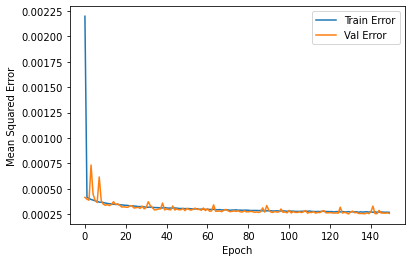

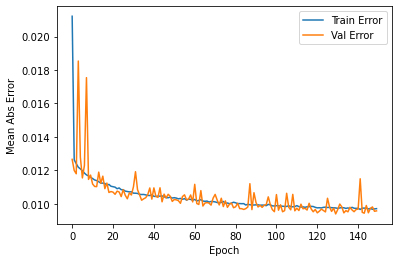

In [19]:
hist = pd.DataFrame(lr2.history)
hist['epoch'] = lr2.epoch
#hist.tail
def plot_history(lr2):
    hist = pd.DataFrame(lr2.history)
    hist['epoch'] = lr2.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(hist['epoch'],hist['mse'],
             label='Train Error')
    plt.plot(hist['epoch'],hist['val_mse'],
             label='Val Error')
    plt.legend()
    plt.autoscale(enable=True,axis='y',tight=None)

    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'],hist['mae'],
             label='Train Error')
    plt.plot(hist['epoch'],hist['val_mae'],
             label='Val Error')
    plt.legend()
    plt.autoscale(enable=True,axis='y',tight=None)
    
plot_history(lr2)

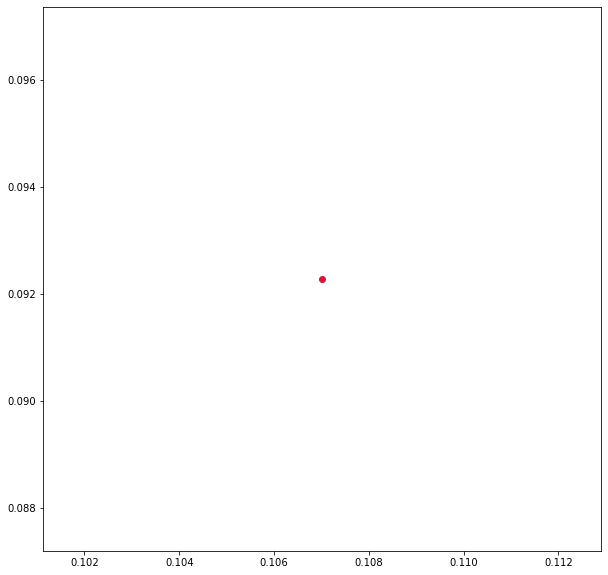

In [11]:
#%% Plots for Outputs
plt.figure(figsize=(10,10))
plt.scatter(y_test_scaled[0], predictions[0], c='crimson')
#plt.yscale('log')
#plt.xscale('log')

#p1 = max(max(predictions[0]), max(y_test_scaled[0]))
#p2 = min(min(predictions[0]), min(y_test_scaled[0]))
#plt.plot([p1, p2], [p1, p2], 'b-')
#plt.xlabel('Observed', fontsize=15)
#plt.ylabel('Predictions', fontsize=15)
#plt.axis('equal')
#plt.show()

In [5]:
true_value = y_test
Pred = mymodel_new.predict(X_test_scaled)
prediction =pd.DataFrame(Pred)
predicted_value = scaler_y.inverse_transform(prediction)
predicted_value = pd.DataFrame(predicted_value)
true_value.columns = y_test.columns
predicted_value.columns = y_test.columns
predicted_value.head
true_value.head

<bound method NDFrame.head of         Lab_Chlorophyll (ug/l)
15811                 8.241265
148228                6.516248
18850                13.030118
96513                15.450291
84417                11.923017
...                        ...
24699                 7.056925
150120                8.421490
12149                 8.086786
63223                13.905500
129927                9.502844

[47975 rows x 1 columns]>

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

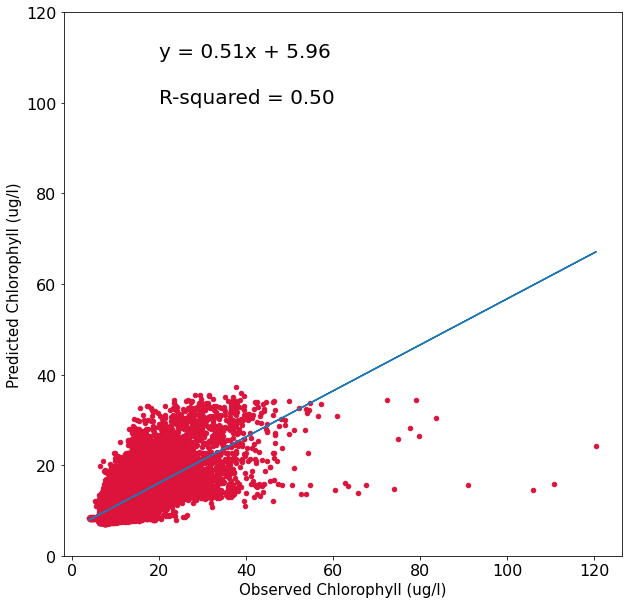

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(true_value ["Lab_Chlorophyll (ug/l)"], predicted_value["Lab_Chlorophyll (ug/l)"], c='crimson',s=20)
x = true_value ["Lab_Chlorophyll (ug/l)"]
y = predicted_value["Lab_Chlorophyll (ug/l)"]
m, b = np.polyfit(x, y, 1)
plt.ylim([0, 120])
plt.plot(x, (m*x)+b, label='y={:.2f}x+{:.2f}'.format(m,b))
plt.xlabel('Observed Chlorophyll (ug/l)', fontsize=15)
plt.ylabel('Predicted Chlorophyll (ug/l)', fontsize=15)
plt.text(20,110, 'y = 0.51x + 5.96', fontsize = 20)
plt.text(20,100, 'R-squared = 0.50', fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [7]:
[m,b]

[0.5075561106809966, 5.961796233058476]